In [10]:
import sys
sys.path.append('../../../src')
from helpers import *
%matplotlib notebook

### Import data, summarise quantification

In [11]:
df = pd.read_csv('../../Raw analysis/PH rundown/NEBD_Embryos_dataframe.csv')
df_quantification = pd.read_csv('../../Raw analysis/PH rundown/Quantification.csv')
df_quantification_grouped = df_quantification.groupby('EmbryoID')

df_summary = pd.DataFrame()
for i, r in df_quantification_grouped:
    cyt = np.mean(r['Cytoplasmic signal'])
    mem_tot = np.mean(r['Membrane signal'])
    mem_ant = bounded_mean_1d(r['Membrane signal'], [0.4, 0.6])
    mem_post = bounded_mean_1d(r['Membrane signal'], [0.9, 0.1]) 
    p = {'EmbryoID': i, 'Cyt': cyt, 'Mem_tot': mem_tot, 'Mem_ant': mem_ant, 'Mem_post': mem_post} 
    df_summary = df_summary.append(pd.DataFrame(p, index=[i]))
df = pd.merge(df, df_summary, on='EmbryoID')

# Add uniform vs polarised column
df['UniPol'] = 'Uni'

# Filter
df = df[df.Line == 'od58']

# Remove highest point (outlier)
df = df.drop(index=df['Cyt'].idxmax())

# Normalise units
mem_norm = np.max(df.Mem_tot)
cyt_norm = np.max(df.Cyt)
df.Mem_tot /= mem_norm
df.Mem_ant /= mem_norm
df.Mem_post /= mem_norm
df.Cyt /= cyt_norm
df

,Unnamed: 0,Path,EmbryoID,Line,Date,RNAi,Cyt,Mem_tot,Mem_ant,Mem_post,UniPol
7,7,/Users/blandt/Desktop/Paper data/Imaging/PH ru...,1565356359,od58,190809,1908081630xfp,0.645055,0.591818,0.670563,0.499061,Uni
8,8,/Users/blandt/Desktop/Paper data/Imaging/PH ru...,1565356740,od58,190809,1908081630xfp,0.739763,0.721511,0.811635,0.660083,Uni
9,9,/Users/blandt/Desktop/Paper data/Imaging/PH ru...,1565356899,od58,190809,1908081630xfp,0.664640,0.718763,0.874120,0.570599,Uni
10,10,/Users/blandt/Desktop/Paper data/Imaging/PH ru...,1565356990,od58,190809,1908081630xfp,0.623456,0.654170,0.675909,0.542498,Uni
11,11,/Users/blandt/Desktop/Paper data/Imaging/PH ru...,1565357105,od58,190809,1908081630xfp,0.422320,0.423537,0.455003,0.434264,Uni
13,13,/Users/blandt/Desktop/Paper data/Imaging/PH ru...,1565358564,od58,190809,1908081030xfp,0.458293,0.417567,0.505561,0.313691,Uni
14,14,/Users/blandt/Desktop/Paper data/Imaging/PH ru...,1565358687,od58,190809,1908081030xfp,0.139324,0.091779,0.065874,0.084525,Uni
15,15,/Users/blandt/Desktop/Paper data/Imaging/PH ru...,1565359132,od58,190809,1908081030xfp,0.516695,0.464254,0.428979,0.428916,Uni
16,16,/Users/blandt/Desktop/Paper data/Imaging/PH ru...,1565359289,od58,190809,1908081030xfp,0.308250,0.240446,0.269703,0.181128,Uni
17,17,/Users/blandt/Desktop/Paper data/Imaging/PH ru...,1565359415,od58,190809,1908081030xfp,0.385389,0.346287,0.396056,0.269589,Uni


###  Fitting functions (without shared intercept)

In [12]:
import scipy.odr as odr
from scipy.optimize import curve_fit

def exponent_model(x, a, b):
    return a * (x ** b)

def exponent_model_intercept(x, a, b, c):
    return a * (x ** b) + c

def single_fit(cyt, mem, intercept):
    
    # OLS fit
    if not intercept:
        params, pcov = curve_fit(exponent_model, cyt, mem, maxfev=100000)
    else:
        params, pcov = curve_fit(exponent_model_intercept, cyt, mem, maxfev=100000)
    
#     # ODR fit
#     if not intercept:        
#         def perform_odr(x, y):
#             quadr = odr.Model(lambda B, x: exponent_model(x, *B))
#             mydata = odr.Data(x, y)
#             myodr = odr.ODR(mydata, quadr, beta0=popt)
#             output = myodr.run()
#             return output      
#     else:
#         def perform_odr(x, y):
#             quadr = odr.Model(lambda B, x: exponent_model_intercept(x, *B))
#             mydata = odr.Data(x, y)
#             myodr = odr.ODR(mydata, quadr, beta0=popt)
#             output = myodr.run()
#             return output
        
#     regression = perform_odr(cyt, mem)
#     params = regression.beta
    return params

def bootstrap_fitting(cyts, mems, intercept, n=1000):
    if intercept:
        params = np.zeros([n, 3])
    else:
        params = np.zeros([n, 2])
    for i in range(n):  
        inds = np.random.choice(range(len(cyts)), len(cyts))
        params[i, :] = single_fit(cyts[inds], mems[inds], intercept=intercept)
    return params

class ExponentConfidenceInterval:
    def __init__(self, df, intercept=False, whole_embryo=False):
        # Input
        self.cyts = df.Cyt.to_numpy()
        if not whole_embryo:
            self.mems = df.Mem_post.to_numpy()
        else:
            self.mems = df.Mem_tot.to_numpy()
        self.unipol = df.UniPol.tolist()
        self.intercept = intercept
        self.run()
        
    def run(self, n_bootstrap=1000, n_x=100, interval=95):
        self.res_x = np.linspace(0, max(self.cyts), n_x)

        # Analysing full dataset
        popt_full = single_fit(self.cyts, self.mems, intercept=self.intercept)
        if self.intercept:
            self.res_y = exponent_model_intercept(self.res_x, *popt_full)
        else:
            self.res_y = exponent_model(self.res_x, *popt_full)
        self.exponent_full = popt_full[1]

        # Bootstrapping
        params = bootstrap_fitting(self.cyts, self.mems, intercept=self.intercept)
        self.exponents = params[:, 1]

        # Confidence interval
        all_fits = np.zeros([n_bootstrap, n_x])
        if not self.intercept:
            for i, p in enumerate(params):
                all_fits[i, :] = exponent_model(self.res_x, *p)
        else:
            for i, p in enumerate(params):
                all_fits[i, :] = exponent_model_intercept(self.res_x, *p)
        self.all_fits_lower = np.percentile(all_fits, (100 - interval) / 2, axis=0)
        self.all_fits_upper = np.percentile(all_fits, 50 + (interval / 2), axis=0)

### Plotting functions

In [6]:
def lighten(color, amount=1):
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], max(0, min(1, amount * c[1])), c[2])

def plot_rundown_ci(ax, res, color):
    ax.plot(res.res_x, res.res_y, c=color, zorder=0)
    ax.fill_between(res.res_x, res.all_fits_lower, res.all_fits_upper, alpha=0.1, color=color)
    ax.set_xlabel('Cytoplasmic conc. (norm.)', fontsize=9)
    ax.set_ylabel('Membrane conc. (norm.)', fontsize=9)
    ax.tick_params(axis='both', labelsize=8)
    b = np.array([r == 'Pol' for r in res.unipol])
    ax.scatter(res.cyts[~b], res.mems[~b], color=lighten(color), linewidth=0.1, edgecolors='k', s=20)
    ax.scatter(res.cyts[b], res.mems[b], color=color, linewidth=0.1, edgecolors='k', s=20)

import scipy.stats as st

def violin(ax, res, xpos, color):
    kde = st.gaussian_kde(res.exponents)
    xx = np.linspace(min(res.exponents), max(res.exponents), 1000)
    kde_xx = kde(xx)
    ax.fill_betweenx(xx, xpos - 0.8 * (kde_xx / max(kde_xx)), 
                     xpos + 0.8 * (kde_xx / max(kde_xx)), color=color, linewidth=0)
    ax.plot([xpos, xpos], [np.percentile(res.exponents, 2.5), np.percentile(res.exponents, 97.5)], c='k', 
            linewidth=0.5)
    ax.scatter(xpos, res.exponent_full, c='k', s=5)
#     ax.set_ylim(0, 3.5)

### Full figure

In [7]:
def full_figure(analysis):
    # Create figure
    fig, ax = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 1]})

    # Rundown
    plot_rundown_ci(ax[0], analysis, 'tab:gray')

    # Violin plot
    violin(ax[1], analysis, 1, 'tab:gray')

    # Tidy violin plot
    ax[1].set_xlim(0, 2)
    ax[1].set_xticks([])
    ax[1].set_ylabel('Exponent')
    ax[1].tick_params(axis='both', labelsize=8)
#     ax[1].axhline(1, color='k', linestyle='--', zorder=-100, linewidth=1)

    # Tidy figure
    fig.set_size_inches(4, 2.8)
    fig.subplots_adjust(left=0.25, wspace=0.7, bottom=0.3, right=0.95)
    return fig

### Analysis - zero intercept

<IPython.core.display.Javascript object>


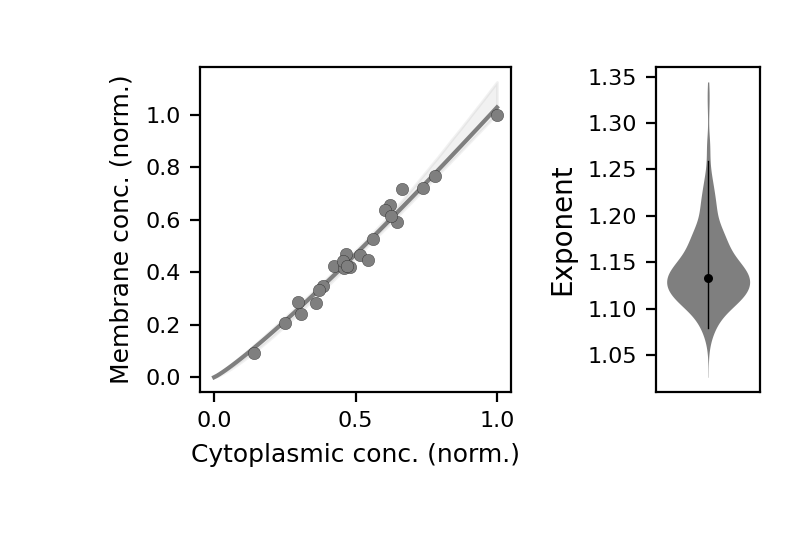

In [8]:
analysis = ExponentConfidenceInterval(df, whole_embryo=True)
fig = full_figure(analysis)
fig.savefig('Figs/fit_zero_intercept.png', dpi=600, transparent=True)

### Analysis - nonzero intercept

<IPython.core.display.Javascript object>


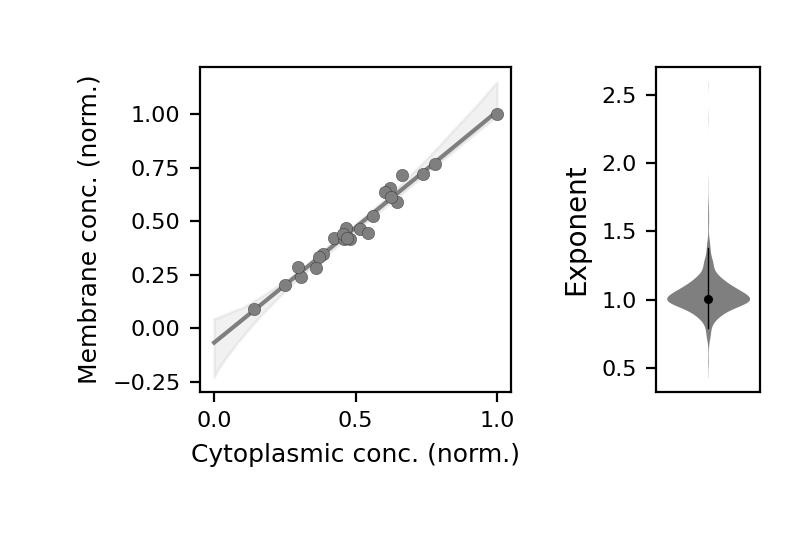

In [9]:
analysis = ExponentConfidenceInterval(df, whole_embryo=True, intercept=True)
fig = full_figure(analysis)
fig.savefig('Figs/fit_nonzero_intercept.png', dpi=600, transparent=True)